# Spectral Indices - Image - Notebook

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

import spectral as sp
import scipy.signal as ss

import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [50, 30]
# plt.rcParams['figure.dpi'] = 600

%matplotlib inline

## Path

In [2]:
# Files path
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-Reflectance")
# Savitzky golay - Check settings
# sg_files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\Imaging_spectroscopy\Phenotyping_macroalgae\data\NIWA-Antarctic-CCA\Kestrel-SG-Reflectance")

# Reflectance images
hdr_list = list(files_path.glob('*.hdr'))
bin_list = list(files_path.glob('*.img'))

# Reflectance images w/ Savitzky-Golay filter
# sg_hdr_list = list(sg_files_path.glob('*.hdr'))
# sg_bin_list = list(sg_files_path.glob('*.img'))

# List of files
targets = list(zip(hdr_list,bin_list))
# sg_targets = list(zip(sg_hdr_list, sg_bin_list))

## Data

In [201]:
i = 9
targets[i][1]

WindowsPath('C:/Users/jcmontes/OneDrive - University of Tasmania/01_Projects_Drive/Imaging_spectroscopy/Phenotyping_macroalgae/data/NIWA-Antarctic-CCA/Kestrel-Reflectance/NIWA-CCA_GHN-05_2004-08-06_02-53-52_reflectance.img')

ImageView object:
  Display bands       :  [0, 178.0, 355]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.9695979952812195]
    G: [0.000593809993006289, 0.7559201121330261]
    B: [0.0, 0.9638161063194275]

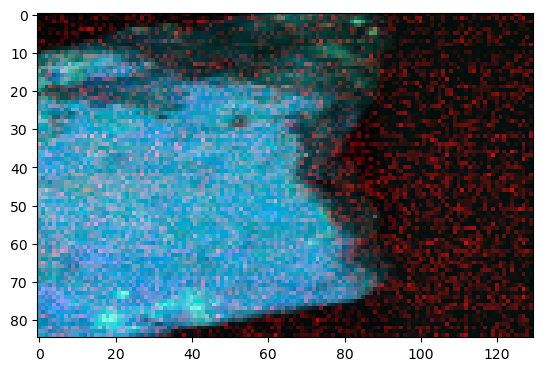

In [203]:
target_open = sp.envi.open(targets[i][0], targets[i][1])
sp.imshow(target_open[180:265,170:300,:]) # GN rocks
# sp.imshow(target_open) #[320:380,170:290,:]) # CE03 rock

In [204]:
target_data = target_open.load()

In [205]:
wvl = [float(i) for i in target_open.metadata['wavelength']]

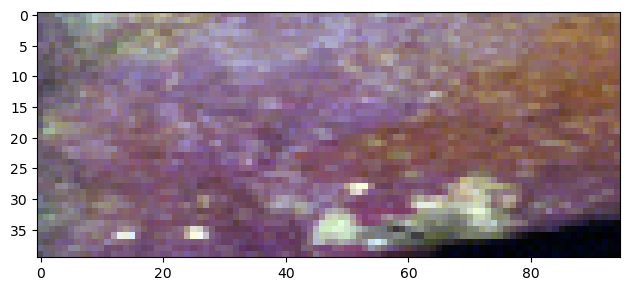

In [241]:
# Cropping region # 31,55
# target_crop = target_data[197:228,215:270,:] # GN08
# target_crop = target_data[217:248,210:265,:] #GN02
# target_crop = target_data[320:380,170:290, :]# CE03
# target_crop = target_data[170:210,170:260, :] # CE02
target_crop = target_data[225:265,140:235,:] #GN05

sp.imshow(target_crop, (144,92,42))
plt.tight_layout()
# plt.savefig('R_map.png', dpi=600)
plt.show()

## Plot meaningful spectral indices

In [242]:
# Search wavelength
# print(wvl)
print(wvl.index(414.58))
print(wvl.index(455.18))

12
36


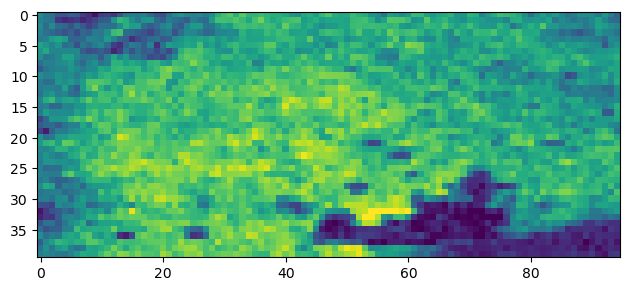

In [243]:
# Double derivative 562.6 nm
dd = ss.savgol_filter(target_crop, 20, 3, axis=2, deriv=2)

# Image show, notice use of vmin and max for adjusted visualization
# dd[:,:,103].min()
plt.imshow(dd[:,:,103], vmin=-0.00020, vmax=0.00152)
# plt.colorbar()
plt.tight_layout()
# plt.savefig('dd_569.png', dpi=600)
plt.show()

In [244]:
import pysptools.spectro as spectro

In [245]:
target_map = np.empty((target_crop.shape[0],target_crop.shape[1],1), dtype=np.float64)
target_map.shape

(40, 95, 1)

In [246]:
# wvl[88:113]

In [247]:
# plt.plot(ss.savgol_filter(target_crop[y,x][10:227], 5, 3))
# Full target crop SG filter then tolist([50:76]) as pre-continuum

In [248]:
# conv_h_q.display_convex_hull_quotient(plot_name='a')

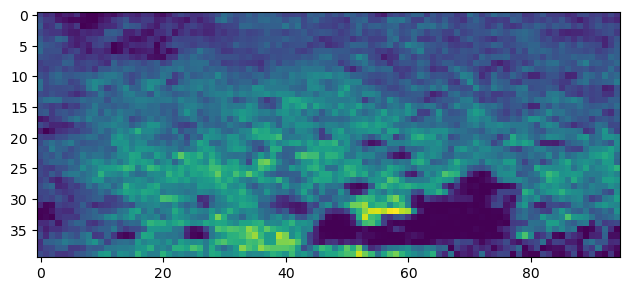

In [249]:
for y in range(0, target_crop.shape[0]):
    for x in range(0, target_crop.shape[1]):
        # print(target_crop[y,x])
        sav_gol_filter = ss.savgol_filter(target_crop[y,x][88:113], 15, 3)
        pre_continuum = sav_gol_filter.tolist()
        # print(sav_gol_filter)
        bands = list(wvl[88:113]) # Select bands (PE563, 88:113), CHL [12:36]
        conv_h_q = spectro.FeaturesConvexHullQuotient(pre_continuum, bands, baseline=0.9999)
        auc = conv_h_q.get_area(feat_no=1)
        mbd = conv_h_q.get_absorbtion_depth(feat_no=1)
        anmb = auc/mbd
        # print(i, conv_h_q.get_area(feat_no=1), conv_h_q.get_absorbtion_depth(feat_no=1))
        target_map[y, x] = anmb

plt.imshow(target_map)
plt.tight_layout()
# plt.savefig('auc_563.png', dpi=600)

In [250]:
target_map.min()

0.0001762673118858122

In [251]:
target_map.max()

13.946786644773063

In [252]:
## ND 563

800.02 562.6


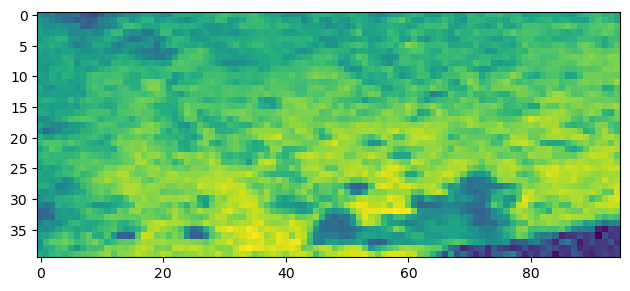

In [253]:
print(wvl[237], wvl[99])

psnd_pe = (target_crop[:,:,237] - target_crop[:,:,99]) / (target_crop[:,:,237] + target_crop[:,:,99])

plt.imshow(psnd_pe)
# plt.title("Pigment Specific Normalized Difference for Phycoerythrin")
# plt.colorbar()
plt.tight_layout()
# plt.savefig('ND_563.png', dpi=600)

In [24]:
a = np.reshape(target_crop[:,:,51:74], (-1,23))

b = np.zeros(shape= (31, 55,1))

In [231]:
target_crop[:,:,51:74].reshape(-1,len(wvl[51:74])).shape

(1705, 23)

In [ ]:
# a = target_crop[:,:,51:74].ravel()

anmb494 = []

a = ss.savgol_filter(target_crop[:,:,51:74], 3, 1, axis=2)

# unfold_target = target_crop[:,:,45:85].reshape(-1,len(wvl[45:85]))
# unfold_target.shape

for i in a:
    sav_gol_filter = ss.savgol_filter(target_crop[:,:,51:74], 3, 1, axis=2)
    pre_continuum = list(sav_gol_filter)
    bands = list(wvl[51:74])
    conv_h_q = spectro.FeaturesConvexHullQuotient(pre_continuum, wvl, baseline=0.999)
    auc = conv_h_q.get_area(feat_no=1)
    mbd = conv_h_q.get_absorbtion_depth(feat_no=1)
    anmb = auc/mbd
    print(i, conv_h_q.get_area(feat_no=1), conv_h_q.get_absorbtion_depth(feat_no=1)
    anmb494.append(anmb)

SyntaxError: invalid syntax (1308540375.py, line 19)

In [322]:
# arr = np.array(anmb494)
print('Shape Original: ', target_crop[:,:,51:74].shape)
print('Shape 2: ', target_crop[:,:,51:74].reshape(-1,len(wvl[51:74])).shape)
print('Shape 3: ', len(anmb494))

# plt.imshow(np.reshape(arr, (31,55,1)))

Shape Original:  (31, 55, 23)
Shape 2:  (1705, 23)
Shape 3:  1705


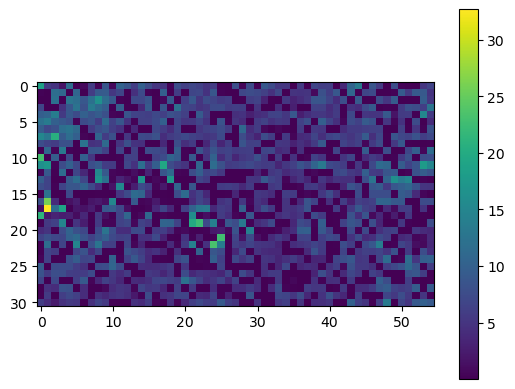

In [330]:
plt.imshow(np.array(anmb494).reshape(31,55,1))
plt.colorbar()
plt.show()

# Spectral Indices (SI) - Image
---
- NDVI: Modified to match Chl a [A] peak *
- Chlorophyll indices: Modified to match Chl a [A] peak *

### Normalized Differenced Vegetation Index
- NDVI = (R800 - R670) / (R800 + R670)
- NDVI = (R800 - R665) / (R800 + R665)*

800.02 665.67


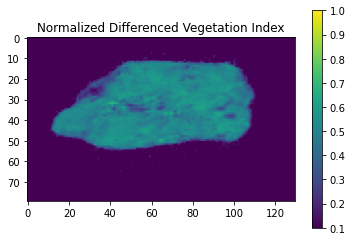

In [150]:
print(wvl[237], wvl[159])
ndvi = (target_crop[:,:,237] - target_crop[:,:,159]) / (target_crop[:,:,237] + target_crop[:,:,159])

plt.imshow(ndvi, vmin=0.1, vmax=1)
plt.title("Normalized Differenced Vegetation Index")
plt.colorbar()

### Plant Senescence Reflectance Index
PSRI = (R678 - R500) / R750

677.72 499.38 750.08


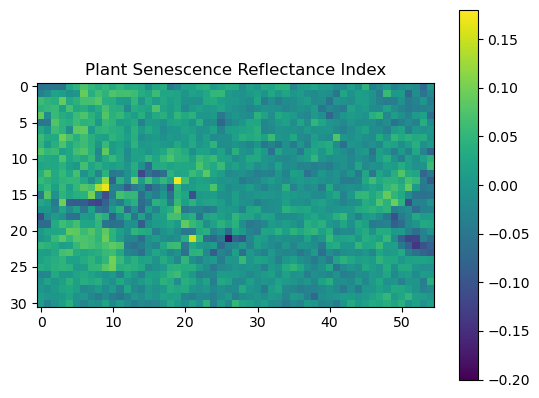

In [150]:
print(wvl[166], wvl[62], wvl[208])

psri = ((target_crop[:,:,166] - target_crop[:,:,62]) / (target_crop[:,:,208]))

# psri[:,:,0].max()
plt.imshow(psri, vmin=-0.2, vmax=0.18)
plt.title("Plant Senescence Reflectance Index")
plt.colorbar()

### Photochemical Reflectance Index
PRI = (R531 - R570) / (R531 + R570)

531.8 569.45


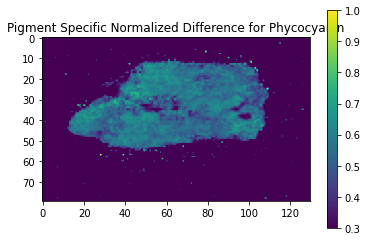

In [129]:
print(wvl[81], wvl[103])

psnd_pc = (target_crop[:,:,81] - target_crop[:,:,103]) / (target_crop[:,:,81] + target_crop[:,:,103])

plt.imshow(psnd_pe, vmin=0.3, vmax=1)
plt.title("Pigment Specific Normalized Difference for Phycocyanin")
plt.colorbar()

### Enhanced Vegetation Index
- EVI = (2.5 * (R800 - R670)) / (1 + R800 + (6 * R670) - (7.5 * R480))

800.02 670.84 480.65


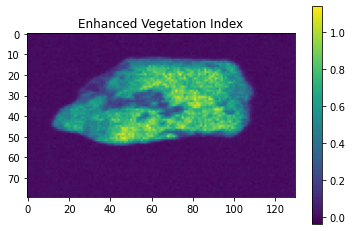

In [14]:
print(wvl[237], wvl[162], wvl[51])

evi = (2.5 * (target_crop[:,:,237] - target_crop[:,:,162])) / (1 + target_crop[:,:,237] + (6 * target_crop[:,:,162]) - (7.5 * target_crop[:,:,51]))

plt.imshow(evi)
plt.title("Enhanced Vegetation Index")
plt.colorbar()

## Chlorophyll indices
---

### Modified Chlorophyll Absorption Reflectance Index
- MCARI = ((R700 - R670) - 0.2 * (R700 - R550)) * (R700 / R670)
- MCARI = ((R700 - R665) - 0.2 * (R700 - R550)) * (R700 / R665) *

Modified peaks of Chl absorbance *

700.12 665.67 550.61


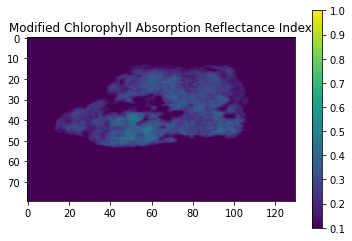

In [158]:
print(wvl[179], wvl[159], wvl[92])

mcari = ((target_crop[:,:,179] - target_crop[:,:,159]) - 0.2 * (target_crop[:,:,179] - target_crop[:,:,92])) * (target_crop[:,:,179] / target_crop[:,:,159])

plt.imshow(mcari, vmin=0.1, vmax=1)
plt.title("Modified Chlorophyll Absorption Reflectance Index")
plt.colorbar()

### Pigment Specific Normalized Difference for Chlorophyll a
- PSND_CHLA = (R800 - R680) / (R800 + R680)
- PSND_CHLA = (R800 - R665) / (R800 + R665) *

800.02 665.67


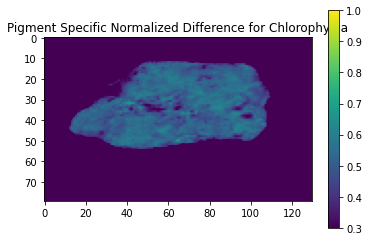

In [152]:
print(wvl[237], wvl[159])

psnd_chla = (target_crop[:,:,237] - target_crop[:,:,159]) / (target_crop[:,:,237] + target_crop[:,:,159])

plt.imshow(psnd_chla, vmin=0.3, vmax=1)
plt.title("Pigment Specific Normalized Difference for Chlorophyll a")
plt.colorbar()

### Pigment Specific Normalized Difference for Chlorophyll b
- PSND_CHLB = (R800 - R635) / (R800 + R635)

Could modify to [A] peak of Chl extract at 624 nm

800.02 634.7


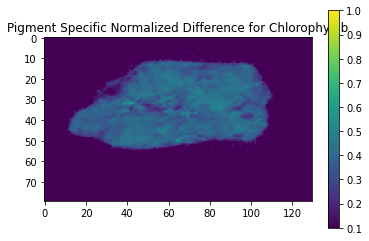

In [125]:
print(wvl[237], wvl[141])

psnd_chlb = (target_crop[:,:,237] - target_crop[:,:,141]) / (target_crop[:,:,237] + target_crop[:,:,141])

plt.imshow(psnd_chlb, vmin=0.1, vmax=1)
plt.title("Pigment Specific Normalized Difference for Chlorophyll b")
plt.colorbar()

### Pigment Specific Simple Ratio for Chlorophyll a
- PSSR_CHLA = R800 / R680
- PSSR_CHLA = R800 / R665 *

800.02 665.67


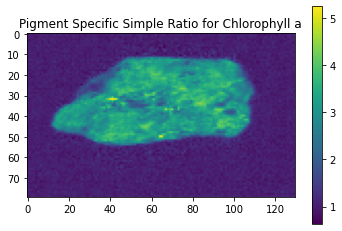

In [155]:
print(wvl[237], wvl[159])

pssr_chla = target_crop[:,:,237] / target_crop[:,:,159]

plt.imshow(pssr_chla)
plt.title("Pigment Specific Simple Ratio for Chlorophyll a")
plt.colorbar()

### Pigment Specific Simple Ratio for Chlorophyll b
- PSSR_CHLB = R800 / R635

Could modify to [A] peak of Chl extract at 624 nm

800.02 634.7


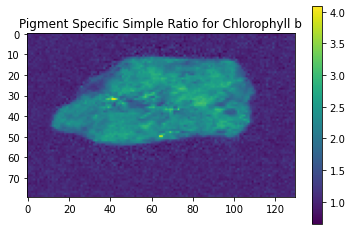

In [135]:
print(wvl[237], wvl[141])

pssr_chlb = target_crop[:,:,237] / target_crop[:,:,141]

plt.imshow(pssr_chlb)
plt.title("Pigment Specific Simple Ratio for Chlorophyll b")
plt.colorbar()

## Phycobilin indices
---
- We based the following SI based on the [A] peaks of phycobilin extractions

### Pigment Specific Normalized Difference for Phycobilin 494 nm
- PSND_PB494 = (R800 - R494) / (R800 + R494)

800.02 494.27


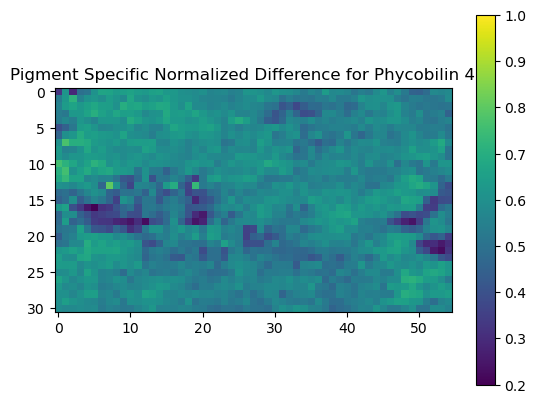

In [36]:
print(wvl[237], wvl[59])

psnd_pb494 = (target_crop[:,:,237] - target_crop[:,:,59]) / (target_crop[:,:,237] + target_crop[:,:,59])

plt.imshow(psnd_pb494, vmin=0.2, vmax=1)
plt.title("Pigment Specific Normalized Difference for Phycobilin 494")
plt.colorbar()

### Pigment Specific Simple Ratio for Phycobilin 494 nm
- PSSR_PB494 = R800 / R494

800.02 494.27


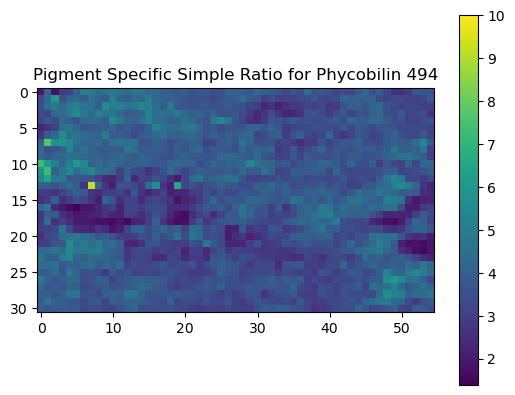

In [37]:
print(wvl[237], wvl[59])

pssr_pb494 = target_crop[:,:,237] / target_crop[:,:,59]

plt.imshow(pssr_pb494, vmax=10)
plt.title("Pigment Specific Simple Ratio for Phycobilin 494")
plt.colorbar()

### Pigment Specific Normalized Difference for Phycoerythrin
- PSND_PE = (R800 - R563) / (R800 + R563)
- Based on Beer & Eshel equation and our [A] peaks

800.02 562.6


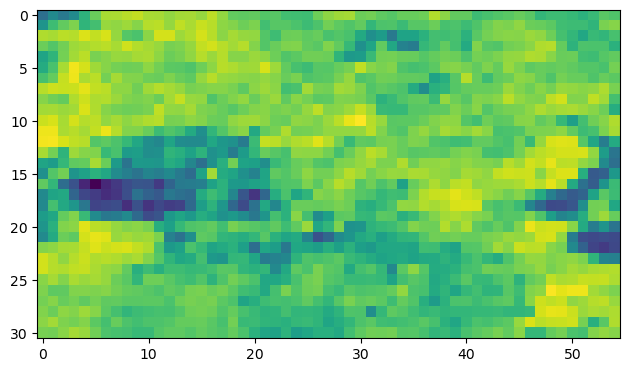

In [47]:
print(wvl[237], wvl[99])

psnd_pe = (target_crop[:,:,237] - target_crop[:,:,99]) / (target_crop[:,:,237] + target_crop[:,:,99])

plt.imshow(psnd_pe, vmin=0.1045, vmax=0.69)
# plt.title("Pigment Specific Normalized Difference for Phycoerythrin")
# plt.colorbar()
plt.tight_layout()
plt.savefig('ND_563.png', dpi=600)

In [45]:
psnd_pe.min()

0.104705565

### Pigment Specific Simple Ratio for Phycoerythrin
- PSSR_PE = R800 / R563

800.02 562.6


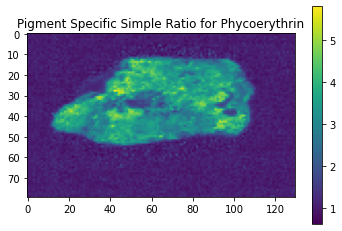

In [163]:
print(wvl[237], wvl[99])

pssr_pe = target_crop[:,:,237] / target_crop[:,:,99]

plt.imshow(pssr_pe)
plt.title("Pigment Specific Simple Ratio for Phycoerythrin")
plt.colorbar()

### Pigment Specific Normalized Difference for Phycocyanin
- PSND_PC = (R800 - R618) / (R800 + R618)
- Based on Beer & Eshel equation
- No peak detected in our [A] phycobilin extractions

800.02 617.51


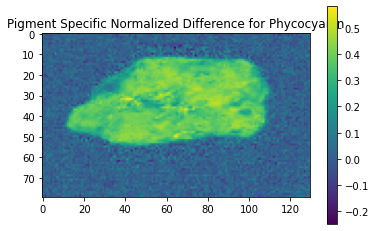

In [166]:
print(wvl[237], wvl[131])

psnd_pc = (target_crop[:,:,237] - target_crop[:,:,131]) / (target_crop[:,:,237] + target_crop[:,:,131])

plt.imshow(psnd_pc)
plt.title("Pigment Specific Normalized Difference for Phycocyanin")
plt.colorbar()

### Pigment Specific Simple Ratio for Phycocyanin
- PSSR_PE = R800 / R618

800.02 617.51


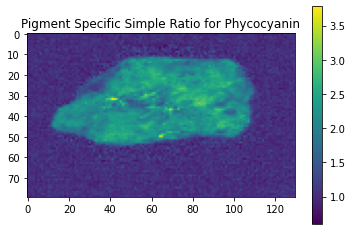

In [167]:
print(wvl[237], wvl[131])

pssr_pe = target_crop[:,:,237] / target_crop[:,:,131]

plt.imshow(pssr_pe)
plt.title("Pigment Specific Simple Ratio for Phycocyanin")
plt.colorbar()

### Pigment Specific Normalized Difference for Allophycocyanin (?)
- PSND_APC = (R800 - R652) / (R800 + R652)
- Possibly not reliable as overlaps with Chl [A] extract peak 655 nm
- Tadmor-Shalev et al.

800.02 651.9


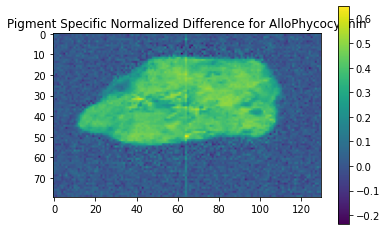

In [170]:
print(wvl[237], wvl[151])

psnd_apc = (target_crop[:,:,237] - target_crop[:,:,151]) / (target_crop[:,:,237] + target_crop[:,:,151])

plt.imshow(psnd_apc)
plt.title("Pigment Specific Normalized Difference for AlloPhycocyanin")
plt.colorbar()

### Pigment Specific Simple Ratio for Allophycocyanin
- PSSR_APC = R800 / R652

800.02 651.9


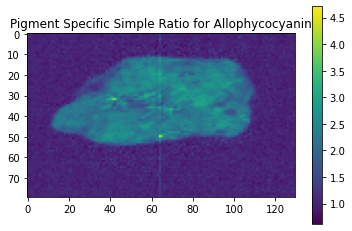

In [171]:
print(wvl[237], wvl[151])

pssr_apc = target_crop[:,:,237] / target_crop[:,:,151]

plt.imshow(pssr_apc)
plt.title("Pigment Specific Simple Ratio for Allophycocyanin")
plt.colorbar()